***

### Name: Prashant Uttam Wakchaure 
### Student No.: 20200126

<h3>Objective: To collect a dataset from one or more open web APIs, and use Python to prepare, analyse, and derive insights from the collected data.</h3>

### Imports:

In [1]:
import pandas as pd
from pandas import json_normalize
import re
import collections
import csv
import requests
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

***

> ## TASK 1. Data Identification and Collection:

***

#### <center><h2> <font color='green'> Choose API</font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='red'> 
a.) Choose one or more APIs from the list of public web APIs provided at the link below. If you decide to use more than one API, these APIs should be related in some way.
    </font></b></h3>

<p style="text-align:justify;"><b>
For this Assignment, I chose the <b><i>Open Movie Database (OMDB)</i></b>, because it is one of the best movie api's available, which not only has information about a particular movie, but also has several international online ratings along with the awards won and other informational columns like the runtime, boxoffice collection, and so on; using which I'll be able to analyse the data and infer relative information from it about the cinema industry around the globe.
    </b></p>

<center> <a href="http://www.omdbapi.com/"><img src="https://www.programmableweb.com/sites/default/files/styles/facebook_scale_width_200/public/OMDb.jpg?itok=J8ecHSBs" alt="OMDB API"></a> </center>

***

#### <center><h2> <font color='green'> Data retrieval and parsing</font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='red'> 
 b.) Collect data from your API(s) using Python. Depending on the choice of API, you might need to repeat the collection process multiple times to download sufficient data for analysis.
    </font></b></h3>

<p style="text-align:justify;">
<b>Request you to not run the below code!
Since it took couple of hours to collect the data into .json and the below code does the same. I have provided the movies.json file and it is thus loaded ahead and used for further data analysis, reason why I have commented it. </b></p>

```python
df = pd.read_csv("imdb.csv")
ob = set()
for i in df["imdb_title_id"]:
    ob.add(i)

c=0
mainc = 0
    
with open ('imdbmovies1.json', 'w', encoding="utf-8") as f:
    f.write("{\"movies\": [")
    for i in ob:
        mainc = mainc + 1
        print("Main Counter:", mainc)
        a = "http://www.omdbapi.com/?i={}&apikey=8248776e".format(i)
        try:
            data = requests.get(a, timeout=2)
            if(data.ok):
                data1 = data.json()
                c = c+1
                print(c, i)
                json.dump(data1, f)
                f.write(",\n")
            else:
                continue 
        
        except(requests.exceptions.HTTPError):
            print('HTTPError')
        except(ValueError):
            print('Decoding JSON has failed')
        except(requests.exceptions.Timeout):
            print('Timeout')
        except(requests.exceptions.TooManyRedirects):
            print('TooManyRedirects')
        except(requests.exceptions.RequestException):
            print('RequestException')
        except(requests.exceptions.ConnectionError):
            print('build http connection failed')
    f.write("]}") 
 ```

***

#### <center><h2> <font color='green'> Data storage in JSON format</font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='red'> 
c.) Save the collected dataset in JSON format for subsequent analysis.
    </font></b></h3>

<p style="text-align:justify;"><b>
Firstly, I found a .csv file (<a href="https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset/download">imdb.csv</a>) online, which contained imdb ids of several movies. So, I loaded the .csv file using pandas, and collected the imdb ids into a set, so as to avoid duplicates.
Further, with writing the imdbmovies.json file, I used the imdb ids appropriately as a query parameter (?i={}) in the omdb api url (http://www.omdbapi.com/), using the specified key (apikey=<i>8248776e</i>) which I received, once I registered the OMDB API website. Then using requests, I dumped the movie dictionaries into the .json file. But first I wrote <b>' {"movies": [ ' </b>
into the file and then started dumping the movie dictionaries one by one using a for loop, and at the end I wrote <b>' ]} ' </b> into the file to form a proper JSON structure, which acted as a list of several dictionaries. So, the list being the movies type and the dictionaries being each movies in it. 
    </b></p>

**********************

> ## TASK 2. Data Preparation and Analysis:

***

<img src="https://miro.medium.com/max/3870/1*eE8DP4biqtaIK3aIy1S2zA.png" alt="Data Science Cycle">


<p style="text-align:justify;"><b>
We will be just focusing on Gathering (OBTAIN), Cleaning (SCRUB) and finding significant insights (EXPLORE) from the dataset in this assignment. ML Modelling and interpreting results will be the future work.
    </b></p>

**********************

#### <center><h2> <font color='green'> Loading Data into Dataframe</font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='red'> 
 a.) Load the stored JSON dataset, and represent it using an appropriate structure (i.e. records/items as rows, described by features as columns).
    </font></b></h3>

<p style="text-align:justify;"><b>
Herein, we load(open) the .json file as read(r) and load it into a variable(data). We also replace the last comma with new line(\n) from the loaded .json file to avoid wrong .json formatting, since the dictionaries are separated by commas and the last comma after the last dictionary is replaced with \n. 
    </b></p>

In [2]:
with open('imdbmovies.json','r') as f:
    s = f.read()
    s = s.replace("},\n]}","}\n]}")
    data = json.loads(s)

<p style="text-align:justify;"><b>
We further use json_normalize from pandas.json to load the movies(data['movies']) into a dataframe(movies), to display it in an appropriate structure(i.e. records/items as rows, described by features as columns). 
    </b></p>

In [3]:
pd.options.display.max_columns = None #display all the columns into the output cell.
pd.options.display.max_rows = None #display all the rows into the output cell.
movies = json_normalize(data = data['movies'])
movies.head()

Title  Year  Rated     Released  Runtime  \
0                     Punks  2000      R  25 Jan 2000   91 min   
1                  Made Men  1999      R  04 Aug 1999   91 min   
2  A Place in the Caribbean  2017  TV-14  23 Mar 2017  114 min   
3           All of a Sudden  2016    N/A  06 Oct 2016  112 min   
4             Jatt & Juliet  2012    N/A  29 Jun 2012  140 min   

                      Genre             Director  \
0    Comedy, Music, Romance      Patrik-Ian Polk   
1  Action, Comedy, Thriller        Louis Morneau   
2            Drama, Romance  Juan Carlos Fanconi   
3            Drama, Mystery            Asli Özge   
4           Comedy, Romance         Anurag Singh   

                                      Writer  \
0                            Patrik-Ian Polk   
1  Robert Franke, Alfred Gough, Miles Millar   
2                        Juan Carlos Fanconi   
3                                  Asli Özge   
4                             Dheeraj Rattan   

                                              Actors  \
0  Seth Gilliam, Andre M. Johnson, Dwight Ewell, ...   
1  Jim Belushi, Michael Beach, Timothy Dalton, St...   
2  José Zúñiga, Gabriela de la Garza, Lali Gonzal...   
3  Sebastian Hülk, Julia Jentsch, Hanns Zischler,...   
4  Diljit Dosanjh, Neeru Bajwa, Jaswinder Bhalla,...   

                                                Plot          Language  \
0                                                N/A           English   
1  While hiding in a small town, a former mobster...           English   
2  Romance is in the air on the picturesque Carib...  Spanish, English   
3  Karsten apparently has it settled. However, in...   German, Russian   
4  Stark opposites, Fateh Singh and Pooja reach C...           Punjabi   

                Country                   Awards  \
0                   USA  3 wins & 2 nominations.   
1                   USA                      N/A   
2         Honduras, USA                      N/A   
3  Germany, Netherlands  3 wins & 2 nominations.   
4         India, Canada                  5 wins.   

                                              Poster  \
0  https://m.media-amazon.com/images/M/MV5BMTY3MD...   
1  https://m.media-amazon.com/images/M/MV5BMWFmMG...   
2  https://m.media-amazon.com/images/M/MV5BMTEwMT...   
3  https://m.media-amazon.com/images/M/MV5BYWRjZG...   
4  https://m.media-amazon.com/images/M/MV5BNmY1Yj...   

                                             Ratings Metascore imdbRating  \
0  [{'Source': 'Internet Movie Database', 'Value'...        55        6.8   
1  [{'Source': 'Internet Movie Database', 'Value'...       N/A        6.0   
2  [{'Source': 'Internet Movie Database', 'Value'...       N/A        8.4   
3  [{'Source': 'Internet Movie Database', 'Value'...       N/A        6.5   
4  [{'Source': 'Internet Movie Database', 'Value'...       N/A        7.5   

  imdbVotes     imdbID   Type          DVD BoxOffice  \
0       228  tt0160710  movie          N/A       N/A   
1     1,667  tt0175877  movie  28 Dec 1999       N/A   
2     1,378  tt4360094  movie          N/A       N/A   
3       649  tt5233510  movie          N/A       N/A   
4     2,350  tt2196254  movie          N/A       N/A   

                                        Production Website Response  \
0  Tall Skinny Black Boy Productions, e2 Filmworks     N/A     True   
1                       Columbia, TriStar Pictures     N/A     True   
2                                              N/A     N/A     True   
3                                  EEE Productions     N/A     True   
4                                              N/A     N/A     True   

  totalSeasons Season Episode seriesID  
0          NaN    NaN     NaN      NaN  
1          NaN    NaN     NaN      NaN  
2          NaN    NaN     NaN      NaN  
3          NaN    NaN     NaN      NaN  
4          NaN    NaN     NaN      NaN

<p style="text-align:justify;"><b>
We see that the Ratings column has a list with several key value pairs(dictionaries). So we have to handle it and much more other things, which comes into picture in the Data Preprocessing part.
    </b></p>

***

#### <center><h2> <font color='green'> Data Preprocessing</font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='red'> 
b.) Apply any preprocessing steps that might be required to clean, filter or engineer the dataset before analysis.
    </font></b></h3>

<p style="text-align:justify;"><b>
Herein, we will first apply pd.Series to the Ratings column; further we just need the Rotten Tomatoes Ratings, as we have the Metacritic and IMDB ratings of the movies in separate columns. So we extract it accordingly and add as a new column in the movies dataframe & finally drop the Ratings column with lists and dictionaries from the dataframe. 
    </b></p>

In [4]:
Ratings = movies['Ratings'].apply(pd.Series)
mov0 = Ratings[1].apply(pd.Series)
movies['rottentomatoesRating'] = mov0['Value']
movies.drop('Ratings', axis=1, inplace=True)

In [5]:
movies.head()

Title  Year  Rated     Released  Runtime  \
0                     Punks  2000      R  25 Jan 2000   91 min   
1                  Made Men  1999      R  04 Aug 1999   91 min   
2  A Place in the Caribbean  2017  TV-14  23 Mar 2017  114 min   
3           All of a Sudden  2016    N/A  06 Oct 2016  112 min   
4             Jatt & Juliet  2012    N/A  29 Jun 2012  140 min   

                      Genre             Director  \
0    Comedy, Music, Romance      Patrik-Ian Polk   
1  Action, Comedy, Thriller        Louis Morneau   
2            Drama, Romance  Juan Carlos Fanconi   
3            Drama, Mystery            Asli Özge   
4           Comedy, Romance         Anurag Singh   

                                      Writer  \
0                            Patrik-Ian Polk   
1  Robert Franke, Alfred Gough, Miles Millar   
2                        Juan Carlos Fanconi   
3                                  Asli Özge   
4                             Dheeraj Rattan   

                                              Actors  \
0  Seth Gilliam, Andre M. Johnson, Dwight Ewell, ...   
1  Jim Belushi, Michael Beach, Timothy Dalton, St...   
2  José Zúñiga, Gabriela de la Garza, Lali Gonzal...   
3  Sebastian Hülk, Julia Jentsch, Hanns Zischler,...   
4  Diljit Dosanjh, Neeru Bajwa, Jaswinder Bhalla,...   

                                                Plot          Language  \
0                                                N/A           English   
1  While hiding in a small town, a former mobster...           English   
2  Romance is in the air on the picturesque Carib...  Spanish, English   
3  Karsten apparently has it settled. However, in...   German, Russian   
4  Stark opposites, Fateh Singh and Pooja reach C...           Punjabi   

                Country                   Awards  \
0                   USA  3 wins & 2 nominations.   
1                   USA                      N/A   
2         Honduras, USA                      N/A   
3  Germany, Netherlands  3 wins & 2 nominations.   
4         India, Canada                  5 wins.   

                                              Poster Metascore imdbRating  \
0  https://m.media-amazon.com/images/M/MV5BMTY3MD...        55        6.8   
1  https://m.media-amazon.com/images/M/MV5BMWFmMG...       N/A        6.0   
2  https://m.media-amazon.com/images/M/MV5BMTEwMT...       N/A        8.4   
3  https://m.media-amazon.com/images/M/MV5BYWRjZG...       N/A        6.5   
4  https://m.media-amazon.com/images/M/MV5BNmY1Yj...       N/A        7.5   

  imdbVotes     imdbID   Type          DVD BoxOffice  \
0       228  tt0160710  movie          N/A       N/A   
1     1,667  tt0175877  movie  28 Dec 1999       N/A   
2     1,378  tt4360094  movie          N/A       N/A   
3       649  tt5233510  movie          N/A       N/A   
4     2,350  tt2196254  movie          N/A       N/A   

                                        Production Website Response  \
0  Tall Skinny Black Boy Productions, e2 Filmworks     N/A     True   
1                       Columbia, TriStar Pictures     N/A     True   
2                                              N/A     N/A     True   
3                                  EEE Productions     N/A     True   
4                                              N/A     N/A     True   

  totalSeasons Season Episode seriesID rottentomatoesRating  
0          NaN    NaN     NaN      NaN                  50%  
1          NaN    NaN     NaN      NaN                  49%  
2          NaN    NaN     NaN      NaN                  NaN  
3          NaN    NaN     NaN      NaN                  29%  
4          NaN    NaN     NaN      NaN                  88%

<p style="text-align:justify;"><b>
We should always create a copy of the dataframe and use that copy further in order to retrieve anything from the original unprocessed dataframe. 
    </b></p>

In [6]:
mov = movies.copy()

<h3><center style="color: blue;"><b>Dropping unnecessary columns </b> </center></h3>

In [7]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60935 entries, 0 to 60934
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 60935 non-null  object
 1   Year                  60935 non-null  object
 2   Rated                 60935 non-null  object
 3   Released              60935 non-null  object
 4   Runtime               60935 non-null  object
 5   Genre                 60935 non-null  object
 6   Director              60935 non-null  object
 7   Writer                60935 non-null  object
 8   Actors                60935 non-null  object
 9   Plot                  60935 non-null  object
 10  Language              60935 non-null  object
 11  Country               60935 non-null  object
 12  Awards                60935 non-null  object
 13  Poster                60935 non-null  object
 14  Metascore             60935 non-null  object
 15  imdbRating            60935 non-null

<p style="text-align:justify;"><b>
As we can see, all the features are of "object" datatype, this might be because of the object notation of the JSON normalization using pandas. We will handle this shortly. But first we will drop the irrelevant columns which we cannot consider for any potential data analysis. So the columns like <i>Rated, Writer, Plot, Poster, Production, Website, Response</i> are object type and are not essential for any analysis as such, so we drop them. <i>Released</i> is also one column which is reduntant as the year of the movie is enough for analysis, so I dropped it. <i>Type, DVD, Season, Episode, seriesID, totalSeasons</i> are the columns which might come into picture if we consider TV series or any other type of documentaries or shows, but as we are doing EDA on movie data, so we drop these unnecessary columns in the Data preprocessing steps. 
    </b></p>

In [8]:
mov.drop('Rated', axis=1, inplace=True)
mov.drop('Released', axis=1, inplace=True)
mov.drop('Writer', axis=1, inplace=True)
mov.drop('Plot', axis=1, inplace=True)
mov.drop('Poster', axis=1, inplace=True)
mov.drop('Type', axis=1, inplace=True)
mov.drop('DVD', axis=1, inplace=True)
mov.drop('Production', axis=1, inplace=True)
mov.drop('Website', axis=1, inplace=True)
mov.drop('Response', axis=1, inplace=True)
mov.drop('Season', axis=1, inplace=True)
mov.drop('Episode', axis=1, inplace=True)
mov.drop('seriesID', axis=1, inplace=True)
mov.drop('totalSeasons', axis=1, inplace=True)

In [9]:
mov.head()

Title  Year  Runtime                     Genre  \
0                     Punks  2000   91 min    Comedy, Music, Romance   
1                  Made Men  1999   91 min  Action, Comedy, Thriller   
2  A Place in the Caribbean  2017  114 min            Drama, Romance   
3           All of a Sudden  2016  112 min            Drama, Mystery   
4             Jatt & Juliet  2012  140 min           Comedy, Romance   

              Director                                             Actors  \
0      Patrik-Ian Polk  Seth Gilliam, Andre M. Johnson, Dwight Ewell, ...   
1        Louis Morneau  Jim Belushi, Michael Beach, Timothy Dalton, St...   
2  Juan Carlos Fanconi  José Zúñiga, Gabriela de la Garza, Lali Gonzal...   
3            Asli Özge  Sebastian Hülk, Julia Jentsch, Hanns Zischler,...   
4         Anurag Singh  Diljit Dosanjh, Neeru Bajwa, Jaswinder Bhalla,...   

           Language               Country                   Awards Metascore  \
0           English                   USA  3 wins & 2 nominations.        55   
1           English                   USA                      N/A       N/A   
2  Spanish, English         Honduras, USA                      N/A       N/A   
3   German, Russian  Germany, Netherlands  3 wins & 2 nominations.       N/A   
4           Punjabi         India, Canada                  5 wins.       N/A   

  imdbRating imdbVotes     imdbID BoxOffice rottentomatoesRating  
0        6.8       228  tt0160710       N/A                  50%  
1        6.0     1,667  tt0175877       N/A                  49%  
2        8.4     1,378  tt4360094       N/A                  NaN  
3        6.5       649  tt5233510       N/A                  29%  
4        7.5     2,350  tt2196254       N/A                  88%

<h3><center style="color: blue;"><b>Handling Null Values </b> </center></h3>

<p style="text-align:justify;"><b>
After observing the data, I figured out that the null values are not implicitly mentioned in np.NaN format and instead are mentioned as N/A, so we manually replace them with NaN and further decide to whether drop them or handle them in some other way.
    </b></p>

In [10]:
mov.replace('N/A',np.NaN, inplace=True)

In [11]:
mov.shape

(60935, 15)

Seaborn's heatmap is the best way to observe the null values

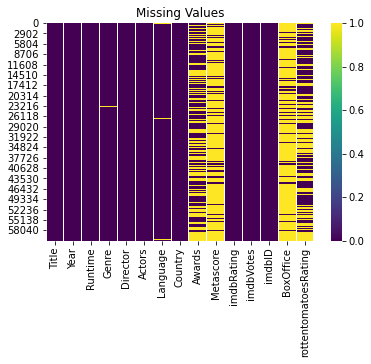

In [12]:
sns.heatmap(mov.isnull(), cmap='viridis')
plt.title("Missing Values")
plt.show()

In [13]:
missing_data = pd.DataFrame({'total_missing': mov.isnull().sum(axis = 0).sort_values(ascending= False), 
                             'perc_missing': mov.isnull().sum(axis = 0).sort_values(ascending= False) 
                             / len(mov) * 100})
missing_data 

total_missing  perc_missing
Metascore                     51274     84.145401
BoxOffice                     50282     82.517437
Awards                        30897     50.704849
rottentomatoesRating          28269     46.392057
Language                        480      0.787725
Runtime                         395      0.648232
Genre                           188      0.308525
imdbVotes                        91      0.149339
imdbRating                       90      0.147698
Actors                           67      0.109953
Director                         65      0.106671
Country                          63      0.103389
imdbID                            0      0.000000
Year                              0      0.000000
Title                             0      0.000000

<p style="text-align:justify;"><b>
    We see that the <i>Metascore</i> column contains nearly 84% of missing data, so we drop the column as we cannot afford to drop the rows as they contain 84% data.
    </b></p>

In [14]:
mov.drop('Metascore', axis=1, inplace=True)

<p style="text-align:justify;"><b>
    After deleting <i>Metascore</i> column, we still see that the <i>rottentomatoesRating, Awards, BoxOffice</i> columns have around <i>46%, 50%, 82% rows missing respectively</i>, but we may not delete these columns, since we can use these columns for potential data analysis, so rather than deleting the columns or rows and loosing potential data either ways, one can tend to keep the values as it is. But...
    </b></p>

In [15]:
movies_without_miss_values = mov[mov['rottentomatoesRating'].notnull()]
movies_without_miss_values = movies_without_miss_values[movies_without_miss_values['Awards'].notnull()]
movies_without_miss_values = movies_without_miss_values[movies_without_miss_values['Runtime'].notnull()]
movies_without_miss_values = movies_without_miss_values[movies_without_miss_values['Country'].notnull()]
movies_without_miss_values = movies_without_miss_values[movies_without_miss_values['Genre'].notnull()]
movies_without_miss_values = movies_without_miss_values[movies_without_miss_values['Actors'].notnull()]
movies_without_miss_values = movies_without_miss_values[movies_without_miss_values['Language'].notnull()]

In [16]:
missing_data = pd.DataFrame({'total_missing': movies_without_miss_values.isnull().sum(axis = 0).sort_values(ascending= False), 
                             'perc_missing': movies_without_miss_values.isnull().sum(axis = 0).sort_values(ascending= False) 
                             / len(movies_without_miss_values) * 100})
missing_data 

total_missing  perc_missing
BoxOffice                     11048     57.490763
rottentomatoesRating              0      0.000000
imdbID                            0      0.000000
imdbVotes                         0      0.000000
imdbRating                        0      0.000000
Awards                            0      0.000000
Country                           0      0.000000
Language                          0      0.000000
Actors                            0      0.000000
Director                          0      0.000000
Genre                             0      0.000000
Runtime                           0      0.000000
Year                              0      0.000000
Title                             0      0.000000

<p style="text-align:justify;"><b>
From the above table, we observe that there are minimal missing values in <i> BoxOffice</i> which can be handled during the analysis stage, but if we delete these rows, we tend to loose other potential information like <i>imdbRating, rottentomatoesRating, Awards Won,Runtime, Year, Director,</i> and so on. So rather than focusing on not at all having any missing or null values, we should focus on extracting relevant information from the other columns.
    </b></p>

In [17]:
movies_without_miss_values.shape

(19217, 14)

<AxesSubplot:>

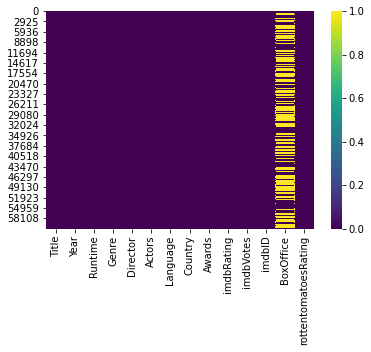

In [18]:
sns.heatmap(movies_without_miss_values.isnull(), cmap='viridis')

<p style="text-align:justify;"><b>
    Now, I deleted the rows where <i> rottentomatoesRating</i>, <i> Awards, Runtime, Country, Genre, Actors, Language</i> are NaN because as we are doing data science exploratory analyses and not further modelling I thought about reducing the shape(rows) of the dataset.
But this is a complete self-choice since one can even plan on keeping it and use them as null as we have more dimension-sized data for somewhat more accurate analyses, but as my computing power is not that much and it will take significant amount of time for some graphs to load, I focused on 15-20k rows ranged dataset which is evident from the shape and the heatmap above. But I'll keep the BoxOffice column as it is as discussed earlier because if I delete the rows where BoxOffice is null, I will loose nearly 10k rows which is a lot. Also, for this assignments' analysis I need the BoxOffice column.
    </b></p>

<h3><center style="color: blue;"><b> Looking for duplicate values </b> </center></h3>

<p style="text-align:justify;"><b>
    Firstly I copied the dataframe without missing values into a new dataframe and further; wrote a function which will find the duplicate columns and return the name of duplicated columns in an array
    </b></p>

In [19]:
mov_df = movies_without_miss_values.copy()

In [20]:
def duplicateColumns(med):
    dupliCols=[]
    for i in range(0,len(med.columns)):
        col1=med.columns[i]
        for col2 in med.columns[i+1:]:
            if med[col1].equals(med[col2]):
                dupliCols.append(col1+','+col2)
    return dupliCols

duplCols=duplicateColumns(mov_df)
duplCols
print('Total Duplicated columns',len(duplCols))
dCols=[col.split(',')[1] for col in duplCols]
dCols

Total Duplicated columns 0


[]

In [21]:
mov_df.duplicated().sum()

0

<p style="text-align:justify;"><b>
Hence, we infer that there are no duplicate columns or values in the dataset.</b></p>

<h3><center style="color: blue;"><b> Extracting and Integrating Dirty Data </b> </center></h3>

<p style="text-align:justify;"><b>
Now, as we had discussed about converting the object datatype of the columns to their numeric transformation, we do the same using pd.to_numeric.</b></p>

In [22]:
mov_df['BoxOffice'] = mov_df['BoxOffice'].str[1:].str.replace(',','') # removing the '$' and 'commas'
box = pd.to_numeric(mov_df.loc[:, ('BoxOffice')]) # Converting to numeric and assigning it to a variable
mov_df.drop('BoxOffice', axis=1, inplace=True) # dropping the original column
mov_df.insert(loc=9, column='BoxOfficeCollections', value=box) # using insert to place the column into position of our choice

year = pd.to_numeric(mov_df.loc[:, ('Year')]) # Converting to numeric and assigning it to a variable
mov_df.drop('Year', axis=1, inplace=True) # dropping the original column
mov_df.insert(loc=1, column='Year', value=year) # using insert to place the column into position of our choice

imdbRating = pd.to_numeric(mov_df.loc[:, ('imdbRating')]) # Converting to numeric and assigning it to a variable
mov_df.drop('imdbRating', axis=1, inplace=True) # dropping the original column
mov_df.insert(loc=12, column='imdbRating', value=imdbRating) # using insert to place the column into position of our choice

mov_df['imdbVotes'] = mov_df['imdbVotes'].str.replace(',','') # removing the 'commas'
imdbVotes = pd.to_numeric(mov_df.loc[:, ('imdbVotes')]) # Converting to numeric and assigning it to a variable
mov_df.drop('imdbVotes', axis=1, inplace=True) # dropping the original column
mov_df.insert(loc=13, column='imdbVotes', value=imdbVotes) # using insert to place the column into position of our choice

mov_df['Runtime'] = mov_df['Runtime'].str.replace(' min','') # removing the 'characters'
runtime = pd.to_numeric(mov_df.loc[:, ('Runtime')]) # Converting to numeric and assigning it to a variable
mov_df.drop('Runtime', axis=1, inplace=True) # dropping the original column
mov_df.insert(loc=2, column='Runtime_in_mins', value=runtime) # using insert to place the column into position of our choice

mov_df['rottentomatoesRating'] = mov_df['rottentomatoesRating'].str.replace('/100','').str.replace('%','') # removing the 'characters'
rottentomatoesRating = pd.to_numeric(mov_df.loc[:, ('rottentomatoesRating')]) # Converting to numeric and assigning it to a variable
mov_df.drop('rottentomatoesRating', axis=1, inplace=True) # dropping the original column
mov_df.insert(loc=13, column='rottentomatoesRating', value=rottentomatoesRating) # using insert to place the column into position of our choice

In [23]:
mov_df['Awards_Nominated'] = mov_df['Awards'].str.extract('(\d+\s+nomination)') # extracting the nominations
mov_df['Awards_Nominated'] = mov_df['Awards_Nominated'].str.replace(' nomination', '') # removing the 'characters'
mov_df['Awards_Nominated'].fillna(0, inplace=True) # filling null values with 0 for further addition
mov_df['Awards_Nominated'] = pd.to_numeric(mov_df.loc[:, ('Awards_Nominated')]) # Converting to numeric

mov_df['AwardsNominated2'] = mov_df['Awards'].str.extract('(^Nominated\s+for\s+\d+)') # extracting more nominations
mov_df['AwardsNominated2'] = mov_df['AwardsNominated2'].str.replace('Nominated for ', '') # removing the 'characters'
mov_df['AwardsNominated2'].fillna(0, inplace=True) # filling null values with 0 for further addition
mov_df['AwardsNominated2'] = pd.to_numeric(mov_df.loc[:, ('AwardsNominated2')]) # Converting to numeric

Awards_Nominated = mov_df['Awards_Nominated'] + mov_df['AwardsNominated2'] # Adding the 2 nominations to get the total
mov_df.drop(['Awards_Nominated','AwardsNominated2'], axis=1, inplace=True) # dropping the sub-original column
mov_df.insert(loc=8, column='Awards_Nominated', value=Awards_Nominated) # using insert to place the column into position of our choice

In [24]:
mov_df['AwardsWon'] = mov_df['Awards'].str.extract('(\d+\s+win)') # extracting the awards won
mov_df['AwardsWon'] = mov_df['AwardsWon'].str.replace(' win', '') # removing the 'characters'
mov_df['AwardsWon'].fillna(0, inplace=True) # filling null values with 0 for further addition
mov_df['AwardsWon'] = pd.to_numeric(mov_df.loc[:, ('AwardsWon')]) # Converting to numeric

mov_df['AwardsWon2'] = mov_df['Awards'].str.extract('(^Won\s+\d+)') # extracting more awards won
mov_df['AwardsWon2'] = mov_df['AwardsWon2'].str.replace('Won ', '') # removing the 'characters'
mov_df['AwardsWon2'].fillna(0, inplace=True) # filling null values with 0 for further addition
mov_df['AwardsWon2'] = pd.to_numeric(mov_df.loc[:, ('AwardsWon2')]) # Converting to numeric

AwardsWon = mov_df['AwardsWon'] + mov_df['AwardsWon2'] # Adding the 2 awards won to get the total
mov_df.drop(['AwardsWon','AwardsWon2'], axis=1, inplace=True) # dropping the sub-original column
mov_df.insert(loc=9, column='Awards_Won', value=AwardsWon) # using insert to place the column into position of our choice

mov_df.drop('Awards', axis=1, inplace=True) # dropping the original column

In [25]:
mov_df.head()

Title  Year  Runtime_in_mins                            Genre  \
0             Punks  2000               91           Comedy, Music, Romance   
3   All of a Sudden  2016              112                   Drama, Mystery   
4     Jatt & Juliet  2012              140                  Comedy, Romance   
6        The Caller  2008               92  Crime, Drama, Mystery, Thriller   
14   Made in Poland  2010               90                            Drama   

                 Director                                             Actors  \
0         Patrik-Ian Polk  Seth Gilliam, Andre M. Johnson, Dwight Ewell, ...   
3               Asli Özge  Sebastian Hülk, Julia Jentsch, Hanns Zischler,...   
4            Anurag Singh  Diljit Dosanjh, Neeru Bajwa, Jaswinder Bhalla,...   
6           Richard Ledes  Axel Feldmann, Grégory Ravary Ellis, Jean Bras...   
14  Przemyslaw Wojcieszek  Piotr Wawer Jr., Janusz Chabior, Przemyslaw Bl...   

           Language               Country  Awards_Nominated  Awards_Won  \
0           English                   USA                 2           3   
3   German, Russian  Germany, Netherlands                 2           3   
4           Punjabi         India, Canada                 0           5   
6           English                   USA                 0           1   
14           Polish                Poland                 2           1   

    BoxOfficeCollections     imdbID  imdbRating  imdbVotes  \
0                    NaN  tt0160710         6.8        228   
3                    NaN  tt5233510         6.5        649   
4                    NaN  tt2196254         7.5       2350   
6                    NaN  tt1049956         5.5       1055   
14                   NaN  tt1311047         6.1        137   

    rottentomatoesRating  
0                     50  
3                     29  
4                     88  
6                     13  
14                    67

<p style="text-align:justify;"><b>
As we are converting the essential columns into their numeric datatype for further analysis, we also deal with some dirty data within the values of the dataset or extracting and integrating the values. For instance, in the <i>Awards</i> column, we have the awards won and the awards nominated for a movie, so we extract the values using regex extraction & replacement and further integrate them into different columns of Awards_Nominated and Awards_Won acccordingly. We do the similar thing with the <i>BoxOffice</i> and <i>rottentomatoesRating</i> which is conspicuously seen in the head of the final dataset.</b></p>

<h3><center style="color: blue;"><b> Correlated Features </b> </center></h3>

<p style="text-align:justify;"><b>
Firstly, I wrote a function which will find the highly correlated columns above the set threshold. Due to the curse of dimensionality, less features usually mean high improvement in terms of speed.</b></p>



In [26]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names

col=correlation(mov_df,0.75)
print('Correlated columns:',col)

Correlated columns: {'Awards_Won'}


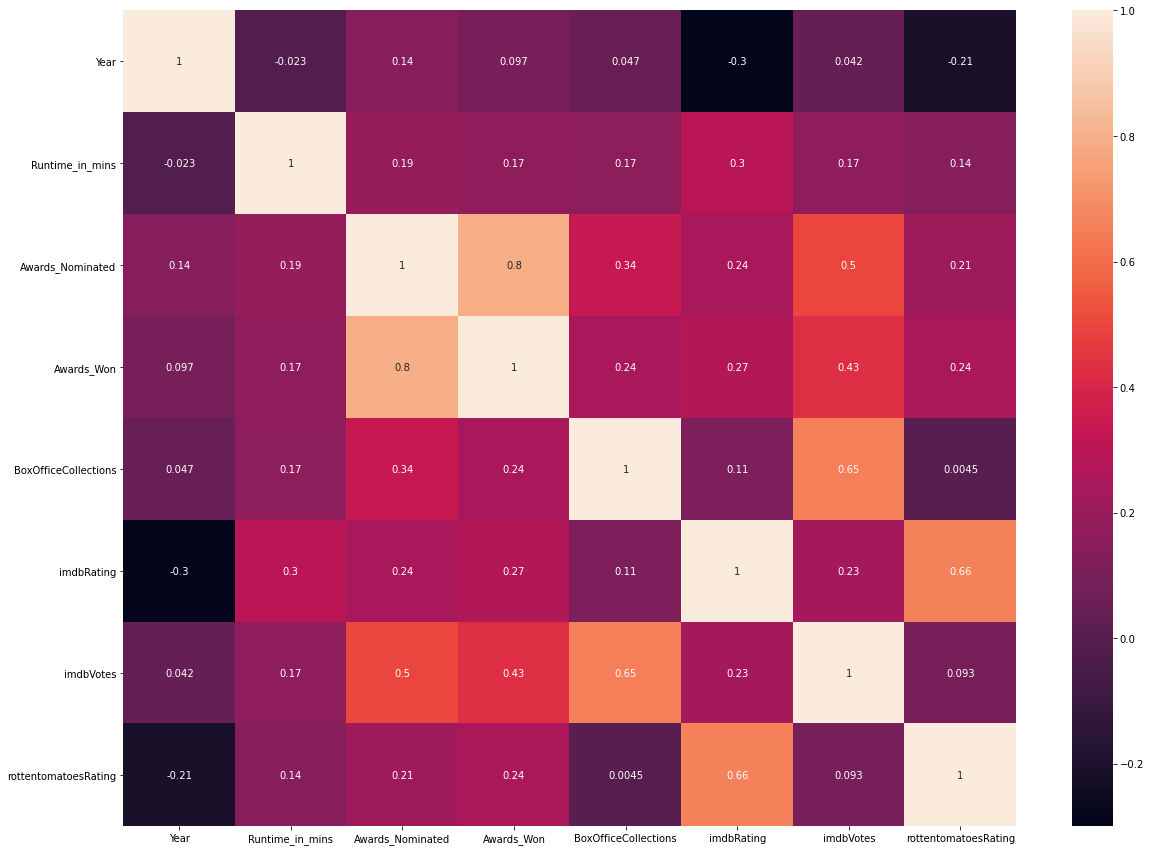

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(mov_df.corr(), annot=True)
plt.show()

<p style="text-align:justify;"><b>
From the output and also from the heatmap it is clear that the newly created <i>Awards_Won</i> and <i>Awards_Nominated</i> columns are having the highest correlation with each other, this is just because of the close values in both the columns, since it is obvious that if the number of nominations are high, it will be most probable that the no. of awards won will be high too.</b></p>
<p style="text-align:justify;"><b>
Also, we are not going to drop any columns based on the correlation score, since we are not doing predictive analysis (ML modelling) in this assignment to take correlation of the features into consideration for better estimations. I showed the correlation matrix because it is what I always display in the data preprocessing or the feature engineering process (when creating any classification model).</b></p>

***

#### <center><h2> <font color='green'> Data Characterisation, Visualization & Analysis</font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='red'> c.) Analyse, characterise, and summarise the cleaned dataset, using tables and visualisations where appropriate. Clearly explain each step of this process, and interpret the results which are produced. </font></b></h3>

<p style="text-align:justify;"><b>
For most of the visualization part, I used the plotly graphing library, which is much more presentable and expressive in terms of its hovering capabilities, wherein if we hover over the graph, we can see the datapoints of the X & Y axis, and many such interesting things which we will see in the graphs ahead. <i> Also, if the figures seem to be missing, I request you to please execute the notebook from the start(all cells). </b></p>
<p style="text-align:justify;"><b>
Henceforth if you execute the below cells, please execute the <i> install plotly</i> cells too.</b></p>


In [28]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install retrying

Note: you may need to restart the kernel to use updated packages.


In [30]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

<p style="text-align:justify;"><b>
Creating a copy of the finalized clean dataset for data analysis and visualizations.</b></p>

In [31]:
mov_df1 = mov_df.copy()

<h3><center style="color: blue;"><b> Statistical Analysis </b> </center></h3>

<p style="text-align:justify;"><b>We will first look at some standard statistical analysis of our finalized dataset: </b></p>

In [32]:
mov_df1.describe()

Year  Runtime_in_mins  Awards_Nominated    Awards_Won  \
count  19217.000000     19217.000000      19217.000000  19217.000000   
mean    1999.191081       105.154915          6.710829      4.241349   
std       19.296142        21.618597         15.905032      9.922825   
min     1912.000000        45.000000          0.000000      0.000000   
25%     1993.000000        92.000000          1.000000      0.000000   
50%     2006.000000       101.000000          3.000000      2.000000   
75%     2013.000000       114.000000          7.000000      4.000000   
max     2020.000000       485.000000        355.000000    300.000000   

       BoxOfficeCollections    imdbRating     imdbVotes  rottentomatoesRating  
count          8.169000e+03  19217.000000  1.921700e+04          19217.000000  
mean           2.431513e+07      6.377718  2.781643e+04             61.485404  
std            5.270628e+07      0.985957  9.212130e+04             25.217978  
min            7.200000e+01      1.400000  1.200000e+01              0.000000  
25%            1.314510e+05      5.800000  6.800000e+02             43.000000  
50%            2.325818e+06      6.500000  2.490000e+03             65.000000  
75%            2.689004e+07      7.100000  1.322700e+04             82.000000  
max            9.366622e+08      9.300000  2.354197e+06            100.000000

In [33]:
mov_df1.skew()

Year                    -1.601758
Runtime_in_mins          2.827517
Awards_Nominated         9.050408
Awards_Won              10.497337
BoxOfficeCollections     5.129352
imdbRating              -0.797057
imdbVotes                8.574934
rottentomatoesRating    -0.423709
dtype: float64

<p style="text-align:justify;"><b>Distribution into Numerical, Discrete and Continuous features: </b></p>

In [34]:
numerical_features = [feature for feature in mov_df1.columns if ((mov_df1[feature].dtypes != 'O') & (feature not in ['y']))]
discrete_feature=[feature for feature in numerical_features if len(mov_df1[feature].unique())<20]
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]

<p style="text-align:justify;"><b>Boxplot to show distribution with respect numerical features: </b></p>

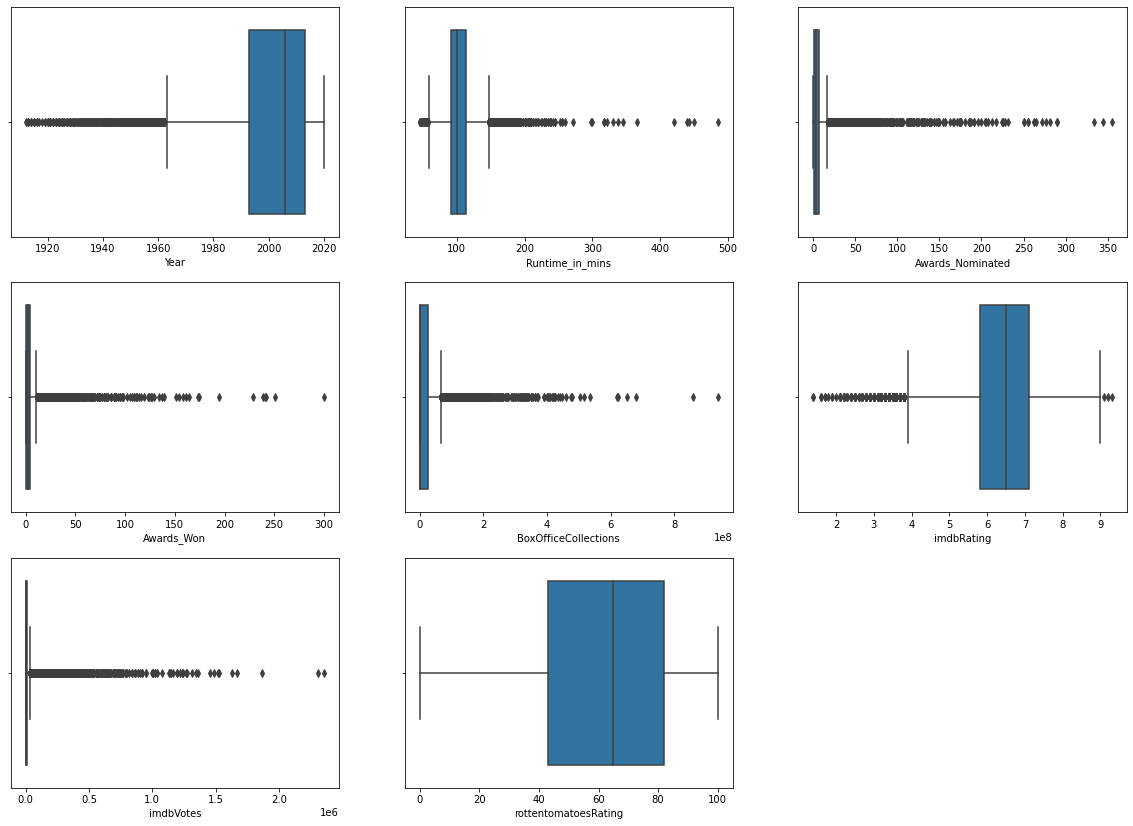

In [35]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x = mov_df1[feature], data = mov_df1)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

<p style="text-align:justify;"><b>Distribution plot of continuous_features observations: </b></p>

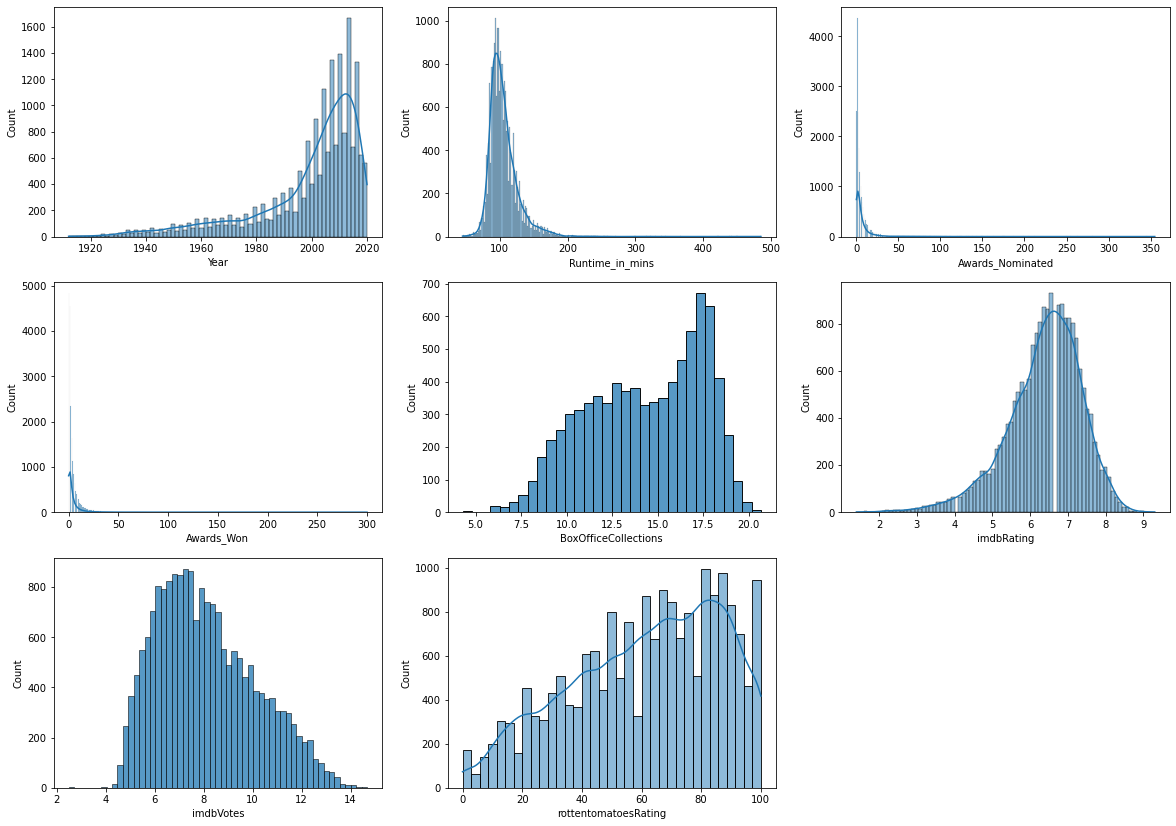

In [36]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    if(continuous_feature=="BoxOfficeCollections" or continuous_feature=="imdbVotes"):
        sns.histplot(np.log(mov_df1[continuous_feature]))
        plt.xlabel(continuous_feature)
        plotnumber+=1
    else:
        sns.histplot(mov_df1[continuous_feature], kde=True)
        plt.xlabel(continuous_feature)
        plotnumber+=1
plt.show() 

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> We observe that all the columns have the count 19,217; except the <i>BoxOfficeCollections</i>, since we didn't remove/replace the null values(we will do this during runtime analysis of BoxOfficeCollections). </b></p></li>
    <li><p style="text-align:justify;"><b> Some of the movies have no awards nominated, or any awards won which is evident from the minimum values. </b></p></li>
    <li><p style="text-align:justify;"><b> The longest movie time is 485 mins, while the shortest movie time is 45 mins. </b></p></li>
    <li><p style="text-align:justify;"><b> The highest boxoffice collection is <i>&dollar;93,666,225</i> and the lowest boxoffice collection is <i>&dollar;72.</i> </b></p></li>
    <li><p style="text-align:justify;"><b> From the skewness and from the interquartile ranges, we see that only <i>rottentomatoesRating</i> is somewhat symmetric in distribution, as its skewness is between -0.5 to 0.5.</b></p></li>
    <li><p style="text-align:justify;"><b> From the boxplot and distplots and also from the skewness, we see that <i>Runtime_in_mins, Awards_Nominated, Awards_Won, BoxOfficeCollections, imdbVotes </i> are having highly skewed distributions. </b></p></li>
    <li><p style="text-align:justify;"><b> Hence, <i>rottentomatoesRating</i> does not have any outliers as evident from the boxplot too, while the rest of the columns do have ranging outliers in them. </b></p></li>
    <li><p style="text-align:justify;"><b> Also, some movies have a minimum <i>rottentomatoesRating</i> of 0 as well as maximum <i>rottentomatoesRating</i> of 100; while the minimum <i>imdbRating</i> is 1.4/10 and the maximum is 9.3/10  </b></p></li>
    <li><p style="text-align:justify;"><b> It is also evident that there are some movies who have neither been nominated for any award, nor won any. </b></p></li>
</ul>

<h3><center style="color: blue;"><b> Descriptive analysis </b> </center></h3>

<p style="text-align:justify;"><b>
In this section, we will have a look at potential information from the dataset with the help of presentable <i>plotly</i> library. </b></p>

<p style="text-align:justify;"><b>
Hovering over the graphs will allow us to see the information more accurately which is the plus point of using <i>plotly</i> library over other traditional libraries like <i>seaborn or matplotlib.</i></b></p>

### <u style="color: darkblue;">High-Rated Movies:</u>

In [37]:
#Best Movies from the dataset:
fig = px.bar(mov_df1.groupby('Title').max().sort_values("imdbRating", ascending=False).head(10), 
             y="imdbRating", hover_data=['Year']) #Hovering over the graph, we can also see the year of every movie
fig.update_layout(title={'text': f"Top 10 movies (by imdbRating)", 'x': 0.5, 
                         'xanchor': 'center', 'font': {'size': 20}})
fig.update_traces(marker_color='green')
fig.show()

In [38]:
#Top-rated Movies according to particular Genres:
genres = ['Horror','Comedy','Drama','Romance','Thriller','Action','Crime','Adventure','Mystery','Fantasy','Sci-Fi','Family']
for i in genres:
    mov_df2 = mov_df1[mov_df1['Genre'].str.contains(i)]
    fig = px.bar(mov_df2.groupby('Title').max().sort_values("imdbRating", ascending=False).head(10),
                 y="imdbRating", hover_data=['Year']) #Hovering over the graph, we can also see the year of every movie
    fig.update_layout(title={'text': f"Top 10 "+ i +" movies (by imdbRating)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
    fig.show()

<img src="https://d2e111jq13me73.cloudfront.net/sites/default/files/styles/product_image_aspect_switcher_170w/public/product-images/csm-movie/shaw-poster.jpg?itok=RQn-PjG5" alt="SSR">


### Insights:
<ul>
    <li><p style="text-align:justify;"><b> The Shawshank Redemption(1994) is the best movie on the imdb with 9.3 rating. It is also the top-rated Drama movie.</b></p></li>
    <li><p style="text-align:justify;"><b> Aguner Poroshmoni & Heerak Rajar Deshe are the only asian movies in the top 10 rated imdb movies.  </b></p></li>
    <li><p style="text-align:justify;"><b> The Godfather as well as its sequel are part of the top 10 movies. The first part is the best rated Crime movie with 9.2/10 rating. </b></p></li>
    <li><p style="text-align:justify;"><b> The Dark Knight, 12 Angry Men and The Godfather: Part II are all rated 9/10.</b></p></li>
    <li><p style="text-align:justify;"><b> Manichitrathazhu - An Indian Film is the best rated Horror film in the dataset.</b></p></li>
    <li><p style="text-align:justify;"><b> Heerak Rajar Deshe is not only in the top 10 but also the best rated Comedy movie in the dataset. </b></p></li>
    <li><p style="text-align:justify;"><b> The Top 10 Romantic movies in the dataset mostly contains Asian-Indian movies, from which Sagara Sangamam is the best rated movie with 8.8/10 imdb rating. </b></p></li>
    <li><p style="text-align:justify;"><b> The Dark Knight is the best Action and Thriller movie. It is also the second best Crime movie. </b></p></li>
    <li><p style="text-align:justify;"><b> 2 movies of The Lord of the Rings are consecutively top-rated Adventure movies, of which The Fellowship of the Ring part is the best Fantasy and Adventure movie. </b></p></li>
    <li><p style="text-align:justify;"><b> There are 3 Avengers movie in the Top 10 Sc-Fi movies. </b></p></li>
    <li><p style="text-align:justify;"><b> Star Wars Episode V is the best rated Sci-Fi movie. </b></p></li>
    <li><p style="text-align:justify;"><b> There are mostly animated movies in the Top 10 highly rated Family Movies, of which Spirited Away - A Japanese Movie is highly rated with 8.6/10. </b></p></li>
</ul>

### <u style="color: darkblue;">Box-Office Collections Year-wise in the dataset:</u>

In [39]:
fig = px.line(mov_df1.groupby('Year').sum(), y="BoxOfficeCollections")
fig.update_layout(title={'text': f"Total BoxOffice Collections for Each Year", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}} )
fig.update_traces(mode='markers+lines',marker_color='red')
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> It is evident from the above graph that the dataset contains movies ranging from the year 1912 to 2020.</b></p></li>
    <li><p style="text-align:justify;"><b> After the year 1976, we see an upward trend in the total box office collections of the movies. In fact, there is a jump from <i>&dollar;466M</i> to around a billion dollar in 1977.  </b></p></li>
    <li><p style="text-align:justify;"><b> The Box Office Collections remain in the billion dollar range from 1977 to 2019. </b></p></li>
    <li><p style="text-align:justify;"><b> We see a sudden decrease in the box office collections in the year 2020 (<i>&dollar;606M</i>), which can be easily guessed due to the spread of COVID-19 at its peak.</b></p></li>
    <li><p style="text-align:justify;"><b> The highest Box Office Collections of the movies worldwide were in the year 2016 with around <i>&dollar;8.6B.</i></b></p></li>
     <li><p style="text-align:justify;"><b> As we did not delete the Box Office Collections null/missing values, it is evident from the graph that some of the initial years have 0 Box Office Collections. </b></p></li>
</ul>

### <u style="color: darkblue;">IMDB Votes Casted by the users every year:</u>

In [40]:
fig = px.line(mov_df1.groupby('Year').sum(), y="imdbVotes")
fig.update_layout(title={'text': f"Total Number of IMDB Votes Casted for Each Year", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}} )
fig.update_traces(mode='markers+lines',marker_color='darkblue')
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> This graph is somewhat similar to the total Box Office Collections graph. The only difference is that there are viable votes casted even in the initial years.</b></p></li>
    <li><p style="text-align:justify;"><b> One interesting thing is that even though IMDB launched in 1990, people have voted for the old movies immensely, particularly in the year 1957. After researching, I found out that 12 Angry Men - one of the highly imdb rated movie was released in 1957.</b></p></li>
    <li><p style="text-align:justify;"><b> There is an upward trend in the graph from the year 1970, where the votes stay in millions from 1971 to 2020. </b></p></li>
    <li><p style="text-align:justify;"><b> The highest no. of votes (25 million) were given in the year 2013. </b></p></li>
    <li><p style="text-align:justify;"><b> There is again a drastic decrease in the no. of votes for the year 2020. </b></p></li>
</ul>

### <u style="color: darkblue;">IMDB Votes Casted by the users for Top 10 Languages:</u>

<p style="text-align:justify;"><b> As multiple movies contain multiple languages, these are separated by commas in the values of the Language row, for which we first split the Language column and use explode from pandas to separate every language.
 </b></p>

In [41]:
mov_df2 = mov_df1.copy() #create copy of the df to avoid overwriting original dataframe.
mov_df2.Language = mov_df1.Language.str.split(', ') #split by commas.
mov_df2 = mov_df2.explode('Language') # explode the language column.

# Now, groupby Language and then use the aggregate function - sum(), further sort by imdbVotes and pick the top 10
fig = px.bar(mov_df2.groupby('Language').sum().sort_values(by="imdbVotes", ascending=False).head(10)
             , y="imdbVotes", hover_data=['Awards_Won']) #Hovering over the graph, we can also see the total awards won.
fig.update_layout(title={'text': f"Total Number of IMDB Votes Casted for Top 10 Languages", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.update_traces(marker_color='orange')
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> It is evident that English is the top language when it comes to the total no. of IMDB Votes (500 million) casted by the users.</b></p></li>
    <li><p style="text-align:justify;"><b> There are 3 asian languages - Japanese, Arabic and Mandarin in the top 10 languages of total IMDB Votes.</b></p></li>
    <li><p style="text-align:justify;"><b> When we hover over the graph, it is clear that English is also the top language when it comes to the total no. of awards won by any language, which is around 52,000. </b></p></li>
</ul>

### <u style="color: darkblue;">Language-wise average imdb Rating & Total movies in each Language: </u>

<p style="text-align:justify;"><b> As multiple movies contain multiple languages, these are separated by commas in the values of the Language column, for which we first split the Language column and use explode from pandas to separate every language. We only select the languages who have over 500 entries in the dataset, since some of the movies with only 1 count might have a high rating which might be wrongly classified as top language when it comes to average imdb Rating.
 </b></p>

In [42]:
mov_df2 = mov_df1.copy() #create copy of the df to avoid overwriting original dataframe.
mov_df2.Language = mov_df1.Language.str.split(', ') #split by commas.
mov_df2 = mov_df2.explode('Language') # explode the language column.

#we only select the languages who have over 500 entries in the dataset.
include = mov_df2.groupby('Language').size().sort_values(ascending=False) >= 500
# Now, groupby Language and then use the aggregate function - mean(), further sort by imdbRating
fig = px.bar(mov_df2.groupby('Language').mean().loc[include].sort_values("imdbRating", ascending=False),
             y="imdbRating", hover_data=['imdbVotes']) #Hovering over the graph, we can also see the average imdbVotes.
fig.update_layout(title={'text': f"Average imdb Rating for Each Language (More than 500 Entries)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.update_traces(marker_color='red')
fig.show()

# PieChart for Count of movies in each language
include = mov_df2.groupby('Language').size().sort_values(ascending=False).to_frame()
include.reset_index(inplace=True)
include.columns = ['Language', 'Count']
# Convert the languages which have less than 500 entries as 'Other Languages'.
include.loc[include['Count'] < 500, 'Language'] = 'Other Languages'
fig = px.pie(include, values='Count', names='Language')
fig.update_layout(title={'text': f"Count of movies in each language", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Japanese movies have the highest average imdb rating as 6.8.</b></p></li>
    <li><p style="text-align:justify;"><b> Even though there are around 45% movies in English language, its average imdb rating is 6.2/10.</b></p></li>
    <li><p style="text-align:justify;"><b> The average imdb rating of Hindi (Bollywood) is higher than English (Hollywood) for the current dataset. </b></p></li>
    <li><p style="text-align:justify;"><b> When we hover over the bar chart, we see that the Russian movies have average imdb Votes casted as 53,000; which justifies its second position in the bar dataset for average imdb rating.</b></p></li>
    <li><p style="text-align:justify;"><b> The languages which have less than 500 entries comprise of around 21.8% movies from the dataset.</b></p></li>
    <li><p style="text-align:justify;"><b> From the above graphs, it is somewhat clear that the average imdb rating is proportional to the imdb Votes casted and the count of movies in each language.</b></p></li>
</ul>

### <u style="color: darkblue;">Country-wise average imdb Rating & Total movies in each Country: </u>

<p style="text-align:justify;"><b> As multiple movies were made in multiple countries, these are separated by commas in the values of the Country column, for which we first split the Country column and use explode from pandas to separate every Country. We only select the countries who have over 500 entries in the dataset, since some of the movies with only 1 count might have a high rating which might be wrongly classified as top country when it comes to average imdb Rating.
 </b></p>

In [43]:
mov_df2 = mov_df1.copy() # create copy of the df to avoid overwriting original dataframe.
mov_df2.Country = mov_df1.Country.str.split(', ') #split by commas.
mov_df2 = mov_df2.explode('Country') # explode the country column.

#we only select the countries who have over 500 entries in the dataset.
include = mov_df2.groupby('Country').size().sort_values(ascending=False) >= 500
# Now, groupby Country and then use the aggregate function - mean(), further sort by imdbRating
fig = px.bar(mov_df2.groupby('Country').mean().loc[include].sort_values("imdbRating", ascending=False),
             y="imdbRating", hover_data=['imdbVotes']) #Hovering over the graph, we can also see the average imdbVotes.
fig.update_layout(title={'text': f"Average imdb Rating for Each Country (More than 500 Entries)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.update_traces(marker_color='brown')
fig.show()

# PieChart for Count of movies in each Country
include = mov_df2.groupby('Country').size().sort_values(ascending=False).to_frame()
include.reset_index(inplace=True)
include.columns = ['Country', 'Count']
# Convert the languages which have less than 250 entries as 'Other Countries'.
include.loc[include['Count'] < 250, 'Country'] = 'Other Countries'
fig = px.pie(include, values='Count', names='Country')
fig.update_layout(title={'text': f"Count of movies in each Country", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Similar to the language(Japanese), in the country-wise distribution of average imdb ratings too, Japan has the movies with highest average imdb rating as 6.8.</b></p></li>
    <li><p style="text-align:justify;"><b> India jumps to second spot in the country-wise distribution of average imdb ratings with 6.7/10.</b></p></li>
    <li><p style="text-align:justify;"><b> Here also, the average imdb rating of Indian movies (Bollywood) is higher than USA movies (Hollywood) for the current dataset. </b></p></li>
    <li><p style="text-align:justify;"><b> When we hover over the bar chart, we see that the USA movies have the highest average imdb Votes casted as 51,000.</b></p></li>
    <li><p style="text-align:justify;"><b> Similar to the language English, the country USA has the highest count of movies. So it is clear that the highest no. of the English movies are made in USA.</b></p></li>
</ul>

### <u style="color: darkblue;">Top 10 Directors by highest Box Office Collections: </u>

<p style="text-align:justify;"><b> As multiple movies were made by multiple directors, these are separated by commas in the values of the Director column, for which we first split the Director column and use explode from pandas to separate every Director. We only select the directors who have over 15 entries in the dataset, since some of the movies with only 1 count might have a high revenue which might be wrongly classified as top director when it comes to highest boxoffice collections.
 </b></p>

In [44]:
mov_df2 = mov_df1.copy()  # create copy of the df to avoid overwriting original dataframe.
mov_df2.Director = mov_df1.Director.str.split(', ') #split by commas.
mov_df2 = mov_df2.explode('Director') # explode the Director column.

#we only select the directors who have over 15 entries in the dataset.
include = mov_df2.groupby(by='Director').size().sort_values(ascending=False) >= 15
# Now, groupby Director and then use the aggregate function - max(), further sort by BoxOfficeCollections
fig = px.bar(mov_df2.groupby('Director').max().loc[include].sort_values("BoxOfficeCollections", ascending=False).head(10),
             y="BoxOfficeCollections", hover_data=['Title','Awards_Won']) 
            #Hovering over the graph, we can also see the Title of the movie and the Awards Won.
fig.update_layout(title={'text': f"Top 10 Directors with highest BoxOffice Collections (More than 15 Entries)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.update_traces(marker_color='orange')
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Steven Spielberg is the best Director when it comes to the highest no. of box office collections with <i>&dollar;435M</i>. The name of the movie after hovering over the bar chart is 'War Horse', It has won 109 awards.</b></p></li>
    <li><p style="text-align:justify;"><b> Even though Martin Scorsese has low no. of total box office collections, his movie - The King of Comedy has won 98 awards. </b></p></li>
    <li><p style="text-align:justify;"><b> From the graphs below, Steven Spielberg's Schindler's List is the highest imdb rated movie with 8.9/10. We can also see the BoxOffice Collections of the top 10 movies in the below bar chart. </b></p></li>
    <li><p style="text-align:justify;"><b> 3 parts of Indiana Jones are in the top 10 of the highest imdb rated movies of Steven. </b></p></li>
</ul>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/Ready_Player_One_Japan_Premiere_Red_Carpet_Steven_Spielberg_%2841604920761%29_%28cropped%29.jpg/220px-Ready_Player_One_Japan_Premiere_Red_Carpet_Steven_Spielberg_%2841604920761%29_%28cropped%29.jpg" alt="SS">


In [45]:
SS = mov_df1[mov_df1["Director"].str.contains("Steven Spielberg")]
SS = SS.sort_values(by= "imdbRating",ascending=False)

fig = px.bar(SS.head(10), x="Title", y="imdbRating",
             hover_data=['BoxOfficeCollections']) #Hovering over the graph, we can also see the BoxOfficeCollections.
fig.update_layout(title={'text': f"Top 10 movies by Steven Spielberg", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.update_traces(marker_color='maroon')
fig.show()

### <u style="color: darkblue;">Director-wise average imdb Rating & Total movies made by each director: </u>

<p style="text-align:justify;"><b> As multiple movies were made by multiple directors, these are separated by commas in the values of the Director column, for which we first split the Director column and use explode from pandas to separate every Director. We only select the directors who have over 15 entries in the dataset, since some of the movies with only 1 count might have a high average rating which might be wrongly classified as top director when it comes to highest average imdb Rating.
 </b></p>

In [46]:
mov_df2 = mov_df1.copy() # create copy of the df to avoid overwriting original dataframe.
mov_df2.Director = mov_df1.Director.str.split(', ') #split by commas.
mov_df2 = mov_df2.explode('Director') # explode the Director column.

#we only select the directors who have over 15 entries in the dataset.
include = mov_df2.groupby(by='Director').size().sort_values(ascending=False) >= 15
# Now, groupby Director and then use the aggregate function - mean(), further sort by imdbRating.
fig = px.bar(mov_df2.groupby('Director').mean().loc[include].sort_values("imdbRating", ascending=False),
             y="imdbRating", hover_data=['BoxOfficeCollections']) 
            #Hovering over the graph, we can also see the BoxOfficeCollections.
fig.update_layout(title={'text': f"Average imdb Rating for Each Director (More than 15 Entries)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}}, margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="LightBlue")
fig.show()

# BarChart for Count of movies made by each director
include = mov_df2.groupby(by='Director').size().sort_values(ascending=False).to_frame()
include.reset_index(inplace=True)
include.columns = ['Director', 'Count']
#we only select the directors who have over 15 entries in the dataset.
include = include.loc[lambda x: x['Count']>=15]

fig = px.bar(include, x="Director", y="Count")
fig.update_layout(title={'text': f"Count of movies done by each Director (More than 15 Entries)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}}, margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="LightBlue")
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Satyajit Ray has the highest average imdb rating as 8.1/10. </b></p></li>
    <li><p style="text-align:justify;"><b> Steven Spielberg - the one whose movie has the highest box office collections, is present in the top 10 of the highest average imdb rating as 7.3/10.</b></p></li>
    <li><p style="text-align:justify;"><b> Woody Allen has made the most no. of movies - 30, and his movies has an average imdb rating of 7/10. </b></p></li>
</ul>

### <u style="color: darkblue;">Top 10 Actors by highest Box Office Collections: </u>

<p style="text-align:justify;"><b> As multiple movies contain multiple actors, these are separated by commas in the values of the Actors column, for which we first split the Actors column and use explode from pandas to separate every Actor. We only select the actors who have over 20 entries in the dataset, since some of the movies with only 1 count might have a high box office collection which might be wrongly classified as top actor when it comes to highest boxoffice collections.
 </b></p>

In [47]:
mov_df2 = mov_df1.copy() # create copy of the df to avoid overwriting original dataframe.
mov_df2.Actors = mov_df1.Actors.str.split(', ') #split by commas.
mov_df2 = mov_df2.explode('Actors') # explode the Actors column.

#we only select the actors who have over 20 entries in the dataset.
include = mov_df2.groupby(by='Actors').size().sort_values(ascending=False) >= 20
# Now, groupby Actors and then use the aggregate function - max(), further sort by BoxOfficeCollections
fig = px.bar(mov_df2.groupby('Actors').max().loc[include].sort_values("BoxOfficeCollections", ascending=False).head(10),
             y="BoxOfficeCollections", hover_data=['Title','Awards_Won']) 
            #Hovering over the graph, we can also see the Title of the movie and the Awards Won.
fig.update_layout(title={'text': f"Top 10 Actors with highest BoxOffice Collections (More than 20 Entries)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.update_traces(marker_color='#0080FF')
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Harrison Ford is the best Actor when it comes to the highest no. of box office collections with <i>&dollar;936M</i>. The name of the movie after hovering over the bar chart is 'Working Girl', It has won 61 awards.</b></p></li>
    <li><p style="text-align:justify;"><b> Even though Christian Bale & Michael Caine has low no. of total box office collections, their movies has won 158 awards each. </b></p></li>
    <li><p style="text-align:justify;"><b> From the graphs below, Harrison Ford's Star Wars Episode V is the highest imdb rated movie with 8.7/10. We can also see the BoxOffice Collections of the top 10 movies in the below bar chart. </b></p></li>
    <li><p style="text-align:justify;"><b> 3 parts of Indiana Jones & Star Wars are in the top 10 of the highest imdb rated movies of Harrison Ford, which gets us back to the most successful director - Steven Spielberg, who also has 3 parts of Indiana Jones in his top 10 highest imdb rated movies. So the Director-Actor pair Steven Spielberg-Harrison Ford is I believe very famous and is thus evident from the stats. </b></p></li>
</ul>

<img src="https://cdn.images.express.co.uk/img/dynamic/36/590x/indiana-jones-5-harrison-ford-1135664.jpg?r=1559578377980" alt="HF">


In [48]:
HF = mov_df1[mov_df1["Actors"].str.contains("Harrison Ford")]
HF = HF.sort_values(by= "imdbRating",ascending=False)

fig = px.bar(HF.head(10), x="Title", y="imdbRating",
             hover_data=['BoxOfficeCollections']) #Hovering over the graph, we can also see the BoxOfficeCollections.
fig.update_layout(title={'text': f"Top 10 movies by Harrison Ford", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.update_traces(marker_color='maroon')
fig.show()

### <u style="color: darkblue;">Actor-wise average imdb Rating & Total movies made by each actor: </u>

<p style="text-align:justify;"><b> As multiple movies contain multiple actors, these are separated by commas in the values of the Actors column, for which we first split the Actors column and use explode from pandas to separate every Actor. We only select the actors who have over 20 entries in the dataset, since some of the movies with only 1 count might have a high average imdb rating which might be wrongly classified as top actor when it comes to highest average imdb rating.
 </b></p>

In [49]:
mov_df2 = mov_df1.copy() # create copy of the df to avoid overwriting original dataframe.
mov_df2.Actors = mov_df1.Actors.str.split(', ') #split by commas.
mov_df2 = mov_df2.explode('Actors') # explode the Actors column.

#we only select the actors who have over 20 entries in the dataset.
include = mov_df2.groupby(by='Actors').size().sort_values(ascending=False) >= 20
# Now, groupby Actor and then use the aggregate function - mean(), further sort by imdbRating.
fig = px.bar((mov_df2.groupby('Actors').mean().loc[include].sort_values("imdbRating", ascending=False)), 
             y="imdbRating", hover_data=['BoxOfficeCollections']) 
fig.update_layout(title={'text': f"Average imdb Rating for Each Actor (More than 20 Entries)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}}, margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="LightBlue")
fig.show()

# BarChart for Count of movies done by each Actor
include = mov_df2.groupby(by='Actors').size().sort_values(ascending=False).to_frame()
include.reset_index(inplace=True)
include.columns = ['Actors', 'Count']
#we only select the actors who have over 20 entries in the dataset.
include = include.loc[lambda x: x['Count']>=20]

fig = px.bar(include, x="Actors", y="Count")
fig.update_layout(title={'text': f"Count of movies done by each actor (More than 20 Entries)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}}, margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="LightBlue")
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Burt Lancaster has the highest average imdb rating as 7.2/10. </b></p></li>
    <li><p style="text-align:justify;"><b> Amitabh Bachchan is the only Bollywood actor who is present in the top 10 highest average imdb rating with 7/10. He is the third highest actor in terms of the total movies done by an actor.</b></p></li>
    <li><p style="text-align:justify;"><b> Gérard Depardieu has worked in the most no. of movies - 52, and his movies has an average imdb rating of 6.6/10. </b></p></li>
</ul>

### <u style="color: darkblue;">Top 10 English movies by Revenue: </u>

In [50]:
top10 = mov_df1.sort_values(by='BoxOfficeCollections', ascending=False)

fig = px.bar(top10.head(10), x="Title", y="BoxOfficeCollections", hover_data=['imdbRating','Awards_Won']) 
fig.update_layout(title={'text': f"Top 10 English movies by Revenue", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}}, margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="LightBlue")
fig.show()

<img src="https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcRUCwAINlIcCAyNbm7a0y7h0UJmR6_ySuwuEjYQibmjJz_NDU5Y" alt="SW">


### <u style="color: darkblue;">Top 10 Non-English movies by Revenue: </u>

In [51]:
top10 = top10[~top10["Language"].str.contains("English")]

fig = px.bar(top10.head(10), x="Title", y="BoxOfficeCollections", hover_data=['imdbRating','Awards_Won']) 
fig.update_layout(title={'text': f"Top 10 Non-English movies by Revenue", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}}, margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="LightBlue")
fig.show()

<img src="https://upload.wikimedia.org/wikipedia/en/c/c4/The_Passion_of_the_Christ_poster.png" alt="PC">


### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Star Wars Episode 7 is the highest box office collection movie with <i> &dollar;936M </i>. </b></p></li>
    <li><p style="text-align:justify;"><b> While The Passion of the Christ is the highest box office non-english movie with <i> &dollar;370M </i>.</b></p></li>
    <li><p style="text-align:justify;"><b> The Dark Knight which comes in the most high rated movie has <i> &dollar;534M </i> </b></p></li>
     <li><p style="text-align:justify;"><b> Baahubali 2 is the only bollywood movie which is present in the top 10 highest revenue.</b></p></li>
</ul>

### <u style="color: darkblue;">Total BoxOffice Collection for each Genre: </u>

<p style="text-align:justify;"><b> As multiple movies contain multiple genres, these are separated by commas in the values of the Genre column, for which we first split the Genre column and use explode from pandas to separate every Genre. We only select the genres who have over 500 entries in the dataset, since some of the movies with only 1 count might have a high box office collection which might be wrongly classified as top genre when it comes to highest box office collection.
 </b></p>

In [52]:
mov_df2 = mov_df1.copy() # create copy of the df to avoid overwriting original dataframe.
mov_df2.Genre = mov_df1.Genre.str.split(', ') #split by commas.
mov_df2 = mov_df2.explode('Genre') # explode the Genre column.

#we only select the genres who have over 500 entries in the dataset.
include = mov_df2.groupby('Genre').size().sort_values(ascending=False) >= 500
# Now, groupby Genre and then use the aggregate function - sum(), further sort by BoxOfficeCollections.
fig = px.bar(mov_df2.groupby('Genre').sum().loc[include].sort_values("BoxOfficeCollections", ascending=False), 
             y="BoxOfficeCollections")
fig.update_layout(title={'text': f"Total BoxOffice Collection for Each Genre (More than 500 Entries)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

# PieChart for Count of movies in each genre
include = mov_df2.groupby('Genre').size().sort_values(ascending=False).to_frame()
include.reset_index(inplace=True)
include.columns = ['Genre', 'Count']
include.loc[include['Count'] < 500, 'Genre'] = 'Other Genres' # Represent only large countries
fig = px.pie(include, values='Count', names='Genre')
fig.update_layout(title={'text': f"Count of movies in each Genre", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Comedy Genre has the highest box office collections of around <i> &dollar;81B & takes up 13.3% of the dataset.</i> </b></p></li>
    <li><p style="text-align:justify;"><b> 27.3% movies are of type Drama out of all the movies in the dataset, and it is the second highest revenue of around <i> &dollar;75B.</i></b></p></li>
    <li><p style="text-align:justify;"><b> Comedy, Romance, Thriller and Action movies are also abundant and contains major share of movies out of the total movies in the dataset as evidently seen from the pie chart above.</b></p></li>
</ul>

### <u style="color: darkblue;"> Award Distribution for different Movie Genres: </u>

<p style="text-align:justify;"><b> As multiple movies contain multiple genres, these are separated by commas in the values of the Genre column, for which we first split the Genre column and use explode from pandas to separate every Genre. We only select the genres who have over 500 entries in the dataset, since some of the movies with only 1 count might have a high box office collection which might be wrongly classified as top genre when it comes to highest box office collection.
 </b></p>

In [53]:
mov_df2 = mov_df1.copy() # create copy of the df to avoid overwriting original dataframe.
mov_df2.Genre = mov_df1.Genre.str.split(', ') #split by commas.
mov_df2 = mov_df2.explode('Genre') # explode the Genre column.

#we only select the genres who have over 500 entries in the dataset.
include = mov_df2.groupby('Genre').size().sort_values(ascending=False) >=500

# Now, groupby Genre and then use the aggregate function - sum(), further sort by Awards_Won.
gen = pd.DataFrame(mov_df2.groupby('Genre')[["Awards_Nominated","Awards_Won"]].sum().loc[include].sort_values(by="Awards_Won",ascending=False))
gen.reset_index(inplace=True)

fig2 = go.Figure(
    data=[
        go.Bar(
            name="Awards Nominated",
            x=gen["Genre"],
            y=gen["Awards_Nominated"],
            offsetgroup=0,
        ),
        go.Bar(
            name="Awards Won",
            x=gen["Genre"],
            y=gen["Awards_Won"],
            offsetgroup=1,
        ),
    ]
)
fig2.update_layout(title={'text': f"Award Distribution for different Movie Genres", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})

fig2.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Drama Genre has the highest no. of awards won(65k) and also the highest no. of awards nominated(98k). </b></p></li>
    <li><p style="text-align:justify;"><b> Awards Nominated for all the genres are greater than Awards Won.</b></p></li>
    <li><p style="text-align:justify;"><b> Comedy, Drama, Thriller, Romance movies are indeed popular in terms of the awards won and nominated as well as the highest box office collections evident from the previous graphs and insights.</b></p></li>
</ul>

### <u style="color: darkblue;">Total 10 Movies by Awards Won: </u>

In [54]:
top10 = mov_df1.sort_values(by='Awards_Won',ascending=False).head(10)

fig = px.bar(top10, x="Title", y="Awards_Won",
             color='Awards_Nominated', barmode='group', hover_data=['Year'])
fig.update_layout(title={'text': f"Top 10 Movies by Awards Won", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

<img src="https://m.media-amazon.com/images/M/MV5BYWZjMjk3ZTItODQ2ZC00NTY5LWE0ZDYtZTI3MjcwN2Q5NTVkXkEyXkFqcGdeQXVyODk4OTc3MTY@._V1_UX182_CR0,0,182,268_AL_.jpg" alt="Parasite">


### <u style="color: darkblue;">Total 10 Movies by Awards Won: </u>

In [55]:
top10 = mov_df1.sort_values(by='Awards_Nominated',ascending=False).head(10)

fig = px.bar(top10, x="Title", y="Awards_Nominated",
             color='Awards_Won', barmode='group', hover_data=['Year'])
fig.update_layout(title={'text': f"Top 10 Movies by Awards Nominated", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

<img src="https://upload.wikimedia.org/wikipedia/en/a/a6/Once_Upon_a_Time_in_Hollywood_poster.png" alt="OUATH">


### Insights:
<ul>
    <li><p style="text-align:justify;"><b> Parasite - A Korean movie from 2019 has the highest number of Awards Won which is 300.  </b></p></li>
    <li><p style="text-align:justify;"><b> Once Upon A Time in Hollywood - The Hollywood multistarrer has received the highest Award Nominations which are 355, out of which they have won 139.</b></p></li>
    <li><p style="text-align:justify;"><b> La La Land and MoonLight; both are present in the Top 10 Most Awarded and Nominated movies in the current dataset.</b></p></li>
</ul>

### <u style="color: darkblue;">Top 10 Movies out of the Movies whose Rotten Tomatoes Rating is 100%: </u>

In [56]:
rot = mov_df1[mov_df1['rottentomatoesRating']==100]

fig = px.bar(rot.sort_values(by='imdbRating',ascending=False).head(10), x="Title",
             y="imdbRating", hover_data=['Year', 'Language'])
fig.update_layout(title={'text': f"Top 10 Movies whose Rotten Tomatoes Rating is 100% (by imdbRating)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

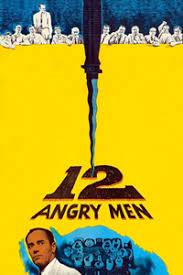


### Insights:
<ul>
    <li><p style="text-align:justify;"><b> There are multiple movies whose Rotten Tomatoes rating is 100%, unlike the imdb Rating which is maximum 9.3/10 for Shawshank Redemption. It is interesting to see that the Rotten Tomatoes for Shawshank Redemption is not 100%.</b></p></li>
    <li><p style="text-align:justify;"><b> 12 Angry Men from 1957; one of the Top rated movies in the highest imdb Rated movies is no. 1 from the Rotten Tomatoes rated movie which are 100%.</b></p></li>
    <li><p style="text-align:justify;"><b> There are 3 Tamil/Telugu movies which are present in the top 10 highest rated Rotten Tomatoes movies.</b></p></li>
</ul>

### <u style="color: darkblue;"> Movie Length Vs Box Office Collections: </u>

In [57]:
fig = px.scatter(mov_df1, x="Runtime_in_mins", y="BoxOfficeCollections", hover_data=['Title'])
fig.update_layout(title={'text': f"Relationship between Time length of the movie and Revenue", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> There are multiple movies whose BoxOffice Collections are missing, but the movies whose runtime is between 75 mins to around 200 mins is actually doing great than the movies whose runtime is more than 200 mins.</b></p></li>
    <li><p style="text-align:justify;"><b> When we hover over the graph, we again see that Star Wars Episode VII has the highest revenue with the run time of 138 mins.</b></p></li>
    <li><p style="text-align:justify;"><b> The Best of Youth has a runtime of 366 and is the highest runtime movie in the above graph. There might be some other movie which might have a larger runtime, which we will see in the next graph.</b></p></li>
</ul>

### <u style="color: darkblue;"> Movie Length Vs Box Office Collections: </u>

In [58]:
top10 = mov_df1.sort_values(by='Runtime_in_mins',ascending=False).head(10)

fig = px.bar(top10, x="Title", y="Runtime_in_mins", hover_data=['Language'])
fig.update_layout(title={'text': f"Top 10 Movies by Length of the movie (in mins)", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}})
fig.show()

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> As discussed earlier, there is a movie bigger than The Best of Youth, which is A Lullaby to the Sorrowful Mystery which has the highest runtime of 485 mins.</b></p></li>
    <li><p style="text-align:justify;"><b> There is only 1 Bollywood movie, which is Gangs of Wasseypur which comes at the 10th spot of the top 10 highest runtime movies in our dataset with 321 mins.</b></p></li>
</ul>

### <u style="color: darkblue;"> Top 250 Highly rated IMDB movies: </u>

In [59]:
top250eng = mov_df1[mov_df1['imdbVotes'] > 25000].sort_values(by="imdbRating",ascending=False).head(250)
top250eng[['Title','imdbRating']]

Title  imdbRating
27513                           The Shawshank Redemption         9.3
13348                                      The Godfather         9.2
40493                             The Godfather: Part II         9.0
45789                                       12 Angry Men         9.0
26612                                    The Dark Knight         9.0
35707                                   Schindler's List         8.9
25264  The Lord of the Rings: The Fellowship of the Ring         8.8
55194                     The Good, the Bad and the Ugly         8.8
27216                                         Fight Club         8.8
20784              The Lord of the Rings: The Two Towers         8.7
49239                                         Goodfellas         8.7
24518                    One Flew Over the Cuckoo's Nest         8.7
59436     Star Wars: Episode V - The Empire Strikes Back         8.7
27794                                              Se7en         8.6
27288                                      Spirited Away         8.6
56171                                      Seven Samurai         8.6
35868                                     The Green Mile         8.6
21354                                  Life Is Beautiful         8.6
6874                                         City of God         8.6
10538                                           Parasite         8.6
14956                                          Hara-Kiri         8.6
56914                           The Silence of the Lambs         8.6
9765                  Star Wars: Episode IV - A New Hope         8.6
12537                                Saving Private Ryan         8.6
9657                                        Interstellar         8.6
42489                                          Gladiator         8.5
43167                                      The Lion King         8.5
1983                                        The Prestige         8.5
4717                                        The Departed         8.5
15528                                 American History X         8.5
48313                                       Modern Times         8.5
1638                              Grave of the Fireflies         8.5
46974                                         Casablanca         8.5
36928                                           Hamilton         8.5
25651                                             Psycho         8.5
57229                                        City Lights         8.5
11076                         Terminator 2: Judgment Day         8.5
50020                        Once Upon a Time in America         8.4
31060                              The Dark Knight Rises         8.4
19108                                               Coco         8.4
7284                                               Alien         8.4
232                                   The Great Dictator         8.4
17887                                             Oldboy         8.4
23718                                     Paths of Glory         8.4
34103                             Avengers: Infinity War         8.4
17631                                        Rear Window         8.4
26686                                     Apocalypse Now         8.4
30528                                              Anand         8.4
47169                                         Your Name.         8.4
8134                                    Django Unchained         8.4
32617  Dr. Strangelove or: How I Learned to Stop Worr...         8.4
43818                                             WALL·E         8.4
39442                                       Sunset Blvd.         8.4
43813                                Like Stars on Earth         8.4
2231                                               Joker         8.4
9032                           Ayla: The Daughter of War         8.4
5180       Indiana Jones and the Raiders of the Lost Ark         8.4
53262                  Spider-Man: Into the Spide

### <u style="color: darkblue;"> Highly rated Non-English movies out of the Top 250 IMDB movies: </u>

In [60]:
top250noteng = top250eng[~top250eng["Language"].str.contains("English")]
top250noteng[['Title','imdbRating']]

Title  imdbRating
55194                  The Good, the Bad and the Ugly         8.8
27288                                   Spirited Away         8.6
56171                                   Seven Samurai         8.6
6874                                      City of God         8.6
14956                                       Hara-Kiri         8.6
1638                           Grave of the Fireflies         8.5
17887                                          Oldboy         8.4
30528                                           Anand         8.4
47169                                      Your Name.         8.4
43813                             Like Stars on Earth         8.4
56520                                           Ikiru         8.3
11160                                               M         8.3
52286                            My Father and My Son         8.3
35556                              Children of Heaven         8.3
53209                                    A Separation         8.3
50085                                  Chak De! India         8.2
2188                                       Tangerines         8.2
27367                            Howl's Moving Castle         8.2
21176                                         Yojimbo         8.2
20533                                The Seventh Seal         8.2
29513                                K.G.F: Chapter 1         8.2
37311                                             Ran         8.2
9888                                  Andaz Apna Apna         8.2
22820                        Uri: The Surgical Strike         8.2
24045                              Bhaag Milkha Bhaag         8.2
32938                     Baahubali 2: The Conclusion         8.2
38132                                      Chhichhore         8.2
34381                                Paan Singh Tomar         8.2
55340                                 Pan's Labyrinth         8.2
50929                        The Secret in Their Eyes         8.2
45767                              Gangs of Wasseypur         8.2
55443                                           Udaan         8.2
2003                                           Sholay         8.2
38573                              My Neighbor Totoro         8.2
22769                                         Stalker         8.2
1162                                       Hera Pheri         8.2
47310                            In the Mood for Love         8.1
37389                                      The Mirror         8.1
37515                                      Departures         8.1
5774                                               PK         8.1
9841                                    Wolf Children         8.1
47951                                   Andrei Rublev         8.1
57624                           Farewell My Concubine         8.1
32583                               The Virgin Spring         8.1
48367                     Dilwale Dulhania Le Jayenge         8.1
59143                            Lage Raho Munna Bhai         8.1
6919                                       Wild Tales         8.1
59138                                         Kahaani         8.1
35778                                  Dil Chahta Hai         8.1
39634                      Portrait of a Lady on Fire         8.1
47558                                Ivan's Childhood         8.1
35832                                   Amores Perros         8.1
27737                            Black Cat, White Cat         8.1
11920                                     A Wednesday         8.1
23319                                          Haider         8.1
45862                           Raise the Red Lantern         8.1
12081                                          Barfi!         8.1
12530                             Munna Bhai M.B.B.S.         8.1
55235                       A Silent Voice: The Movie         8.1
14732  Neon Genesis Evangelion: The End of Evangelion         8.1
10250                 

### Insights:
<ul>
    <li><p style="text-align:justify;"><b> As we have already seen the graph of Top 10 highly rated movies above, we know that The Shawshank Redemption is the highly rated movie with 9.3/10 rating.</b></p></li>
    <li><p style="text-align:justify;"><b> But as we also wanted to see the Non-English movies out of the Top 250 highly rated movies, we see that The Good, the Bad and the Ugly is the highly rated Non-English movie wih 8.8 Rating.</b></p></li>
    <li><p style="text-align:justify;"><b> We can also see that several movies have same imdbRating of 8.6/10.</b></p></li>
    <li><p style="text-align:justify;"><b> If we observe the data, we see several Bollywood movies in the Top 250 highly rated movies.</b></p></li>
</ul>

<img src="https://cdn.europosters.eu/image/750/posters/the-good-the-bad-and-the-ugly-i8932.jpg" alt="OUATH">


### <u style="color: darkblue;"> Most Awards won by a Hindi film: </u>

In [61]:
movdf2 = mov_df1.copy()
movdf2 = movdf2[movdf2['Language'].str.contains('Hindi')]
movdf2 = movdf2.sort_values(by='Awards_Won',ascending=False)
movdf2[['Title','Awards_Won']].head(10)

Title  Awards_Won
45560    Slumdog Millionaire         154
50732             Life of Pi          82
20603        Bajirao Mastani          63
39211                   Lion          59
12081                 Barfi!          58
43623              Gully Boy          57
58490                  Black          56
20194               Fearless          54
24045     Bhaag Milkha Bhaag          52
36290  Kaho Naa... Pyaar Hai          44

<img src="https://d3ddkgxe55ca6c.cloudfront.net/assets/t1497366559/a/3c/cf/130765-ml-354743.jpg" alt="OUATH">


### <u style="color: darkblue;"> Word Clouds: </u>

In [62]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [63]:
from wordcloud import WordCloud

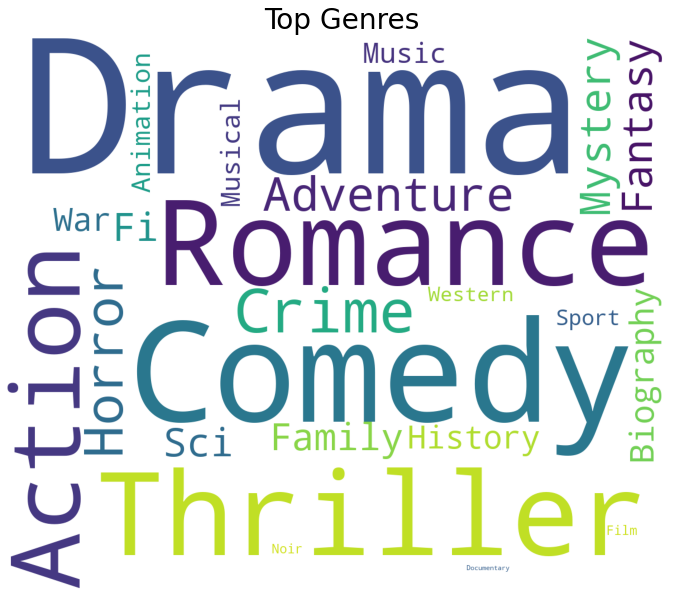

In [64]:
mov_df2 = mov_df1.copy() 
mov_df2.Genre = mov_df1.Genre.str.split(', ')
mov_df2 = mov_df2.explode('Genre')

plt.figure(figsize = (12, 12))
text = ' '.join(mov_df2['Genre'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False, width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top Genres', fontsize=28)
plt.axis("off")
plt.show()

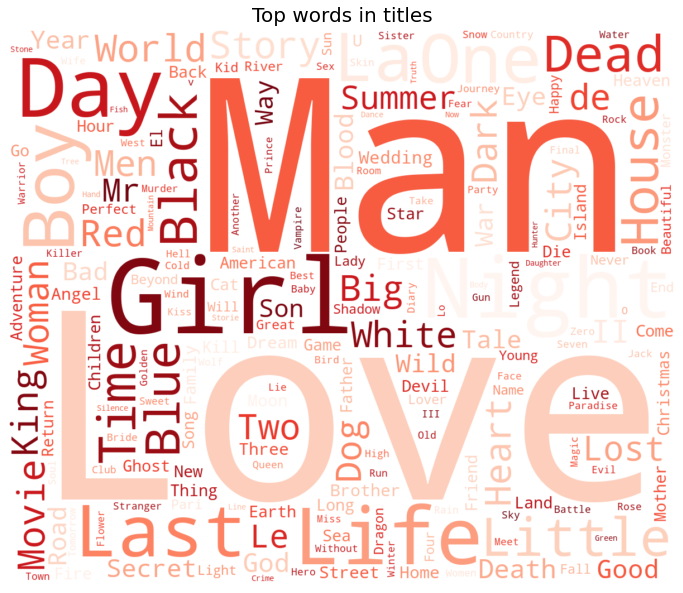

In [65]:
plt.figure(figsize = (12, 12))
text = ' '.join(mov_df1['Title'].values)
wordcloud = WordCloud(margin=10, background_color='white', colormap='Reds', width=1200, height=1000).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top words in titles', fontsize=20)
plt.axis('off')
plt.show()

***

#### <center><h2> <font color='green'> Data Summary and suggestions for future work</font> </h2> </center>

<h3 style="text-align:justify;"><b><font color='red'> 
d.) At the end of your notebook, summarise any insights which you gained from your analysis of the dataset. Suggest ideas for further analysis which could be performed on the data in future.
    </font></b></h3>

### <u style="color: darkblue;"> Summary: </u>

<ul>
    <li><p style="text-align:justify;"><b> After the detail Data Analysis with the help of Statistical graphs as well as descriptive graphs, we have seen significant insights which are displayed after every graph.</b></p></li>
    <li><p style="text-align:justify;"><b> We conclude it by saying that The Shawshank Redemption is the best movie in accordance to the imdbRating, which is the prime feature with which we can evaluate the popularity of the movie.</b></p></li>
    <li><p style="text-align:justify;"><b> We also conclude that Harrison Ford is the best actor which has worked in the movies whose Box Office Collection is the highest, which is Working Girl. </b></p></li>
    <li><p style="text-align:justify;"><b> Steven Spielberg has some amazing contributions to the Hollywood Film Industry and is the best Director in our dataset in terms of the Box Office Collections. His majority movies are rated 8+/10 by imdb. </b></p></li>
    <li><p style="text-align:justify;"><b> We also see that 'Anand' is the best rated Bollywood movie in our dataset with 8.4/10 rating. </b></p></li>
    <li><p style="text-align:justify;"><b> Parasite has won 300 awards; the highest no. of awards won out of all the movies in our dataset.</b></p></li>
    <li><p style="text-align:justify;"><b> Slumdog Millionaire has won 154 awards; the highest no. of awards won out of all the Hindi(Bollywood) movies in our dataset.</b></p></li>
    <li><p style="text-align:justify;"><b> There are around 27.3% of Drama movies in our dataset which is the highest percent and the Drama Genre movies have the highest no. of Award Nominations and Award Wins.</b></p></li>
    <li><p style="text-align:justify;"><b> Around 45% of movies from our dataset are in the English language. Also, around 33% movies are hollwood, in fact made in USA.</b></p></li>
    <li><p style="text-align:justify;"><b> Indian Film Director - Satyajit Ray has made movies which has the highest average IMDB rating of 8.1/10.</b></p></li>
    <li><p style="text-align:justify;"><b> From one of the graphs, we can infer that Filipino movies have high runtime(length).</b></p></li>
    
</ul>

### <u style="color: darkblue;"> Future Work: </u>

<ul>
    <li><p style="text-align:justify;"><b> There are a lot of things which can be implemented and manipulated apart from the comprehensive analysis which we have seen above.</b></p></li>
    <li><p style="text-align:justify;"><b> If there was a Budget column of each movies, then we could have found out the profit made by each movie.</b></p></li>
    <li><p style="text-align:justify;"><b> Unfortunately, there are no actoresses in the dataset, if there were; we could have found out the best Actor-Actoress pair from the dataset.  </b></p></li>
    <li><p style="text-align:justify;"><b> We found out the best director, actor with the help of the scores given to their work in the movies and not to them. If there was some other underlying data, for e.g. the awards won by the actors/directors, then we would have obviously rated them according to that.</b></p></li>
    <li><p style="text-align:justify;"><b> There were a ton of missing values, majority of which I could handle, but as this wasn't about feature engineering and ML modelling, we did not impute the missing values, and stayed intact with the Data Analysis work. </b></p></li>
    <li><p style="text-align:justify;"><b> We could've easily imputed the BoxOffice Collections with the mean of the column, but it would have generated false data, and the graphs would have been inappropriate. But in the future work, one can use KNN imputer to impute the values by prediction.</b></p></li>
    <li><p style="text-align:justify;"><b> As there were around 84% missing values in the MetaScore column, we dropped it; but if there had been values in that column, we could've used that rating along with the rotten tomatoes rating and the imdb rating.</b></p></li>
    <li><p style="text-align:justify;"><b> As we have got an idea of how the first 3 steps of data science analysis - Obtain, Scrub and Explore is done; we can now move forward with modelling and interpreting proper evaluation metrics from the dataset. </b></p></li>
    <li><p style="text-align:justify;"><b> We dropped the Plot column, but one can do sentiment analysis and find out the genre of the movie from the plot if it is well elaborated, which can be an essential and informative Text Analysis.</b></p></li>
    <li><p style="text-align:justify;"><b> We also dropped the Released column, since we already had Year; but later I figured out that if we can extract the month from the Released column, we can plot more graphs and explore more analysis from it.</b></p></li>
     <li><p style="text-align:justify;"><b> If the Box Office Collections' missing values are imputed, we could have a clear relationship between the Runtime length of the movie and the revenue, however the plotted graph in the previous section gives insightful results.</b></p></li>
    <li><p style="text-align:justify;"><b> Rather than giving all the actors, genres, languages, countries, directors names in one column as comma separated values, we can also separate each single actor or director or whatever csv it is as - actor_1, actor_2... and so on (same for other columns). I agree that the dimensionality will increase, but we will avoid using pandas.explode and the time to load the graphs will also be saved.</b></p></li>
    <li><p style="text-align:justify;"><b> I used around 20k rows in the dataset, but one can use the whole 60k rows along wiht proper missing value imputation if one has good GPU and overclockable computation power.</b></p></li>
   
    
</ul>